In [3]:
import numpy as np
import h5py

# Prepration of Data

## Loading the data

In [4]:
train_dataset = h5py.File('datasets/train_cat.h5', "r")
test_dataset = h5py.File('datasets/test_cat.h5', "r")

In [5]:
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

In [6]:
train_set_x_orig.shape #209 pictures, each pic 64x64 with 3 channels

(209, 64, 64, 3)

In [7]:
train_set_y_orig.shape

(209,)

In [8]:
# Reshaping the target labels to a row Vector instead of column Vector
train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0])) 
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

In [9]:
train_set_y_orig.shape

(1, 209)

In [10]:
classes = np.array(['not-cat', 'cat']) # the list of classes

## Visualization

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('Solarize_Light2')

'not-cat'

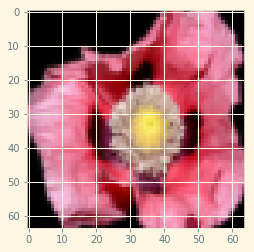

In [57]:
i = np.random.randint(0, 208)
plt.imshow(train_set_x_orig[i])
classes[train_set_y_orig[0,i]]

In [84]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig[0].shape[0]

print ("Number of train data:", m_train)
print ("Number of test data:", m_test)
print ("Height/Width:", num_px)
print ("Image Size:", train_set_x_orig[0].shape)
print ("train_set_x shape ->", train_set_x_orig.shape)
print ("train_set_y shape ->", train_set_y_orig.shape)
print ("test_set_x shape ->", test_set_x_orig.shape)
print ("test_set_y shape ->", test_set_y_orig.shape)

Number of train data: 209
Number of test data: 50
Height/Width: 64
Image Size: (64, 64, 3)
train_set_x shape -> (209, 64, 64, 3)
train_set_y shape -> (1, 209)
test_set_x shape -> (50, 64, 64, 3)
test_set_y shape -> (1, 50)


## Flattening the image

In [15]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)

In [16]:
# we want to have features as rows and data points as columns
train_set_x_flatten.shape

(209, 12288)

In [17]:
train_set_x_flatten = train_set_x_flatten.T
test_set_x_flatten = test_set_x_flatten.T

In [18]:
train_set_x_flatten.shape

(12288, 209)

In [86]:
print ("train_set_x_flatten shape ->", train_set_x_flatten.shape)
print ("train_set_y shape ->", train_set_y_orig.shape)
print ("test_set_x_flatten shape ->", test_set_x_flatten.shape)
print ("test_set_y shape ->", test_set_y_orig.shape)

train_set_x_flatten shape -> (12288, 209)
train_set_y shape -> (1, 209)
test_set_x_flatten shape -> (12288, 50)
test_set_y shape -> (1, 50)


## Normalize the picture

In [87]:
# values were from 0 to 255
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

# Logstic Regression

<img src="LogisticRegression.png" style="width:650px;height:400px;">

### Sigmoid Function

In [30]:
def sigmoid(z):
    return 1./(1. + np.exp(-z))

### Initialize w and b

In [88]:
def initialize(n_0):
    """W1 shape -> (n1, n0)"""
    # here the n1 is 1
    
    w = np.random.randn(1, n_0) * 0.01
    b = 0.
    
    assert w.shape == (1, n_0)
    
    return w, b

## Forward and Backward Propagation

In [32]:
def forward_backward_propagate(w, b, X, Y):    
    m = X.shape[1] #number of training examples
    
    # FORWARD
    z =  np.dot(w, X) + b 
    A = sigmoid(z)                           
    cost = -np.sum( Y*np.log(A)+(1-Y)*np.log(1-A) )/m
    
    
    # BACKWARD
    dw = np.dot(X, (A-Y).T)/m
    db = np.sum(A-Y)/m
    
    
    #Cheking if shapes are right
    assert(dw.shape == w.T.shape)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

## Optimize

In [34]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = forward_backward_propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        # Update parameters
        w = w - learning_rate*dw.T
        b = b - learning_rate*db
        
        # Add the costs after 100th iteration
        if i % 100 == 0:
            costs.append(cost)
        
        #If print_cost is True, print the cost every 100th iteration
        if print_cost and i % 100 == 0:
            print (f"Cost after iteration {i}: {f}")
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

## Predict

In [35]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
#     w = w.reshape(X.shape[0], 1)
    
    z = np.dot(w, X)+b
    A = sigmoid(z)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 0 if A[0, i]<=0.5 else 1
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

## Model
Merging everything to a single function

In [73]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    

    dim = X_train.shape[0]
    
    # initialize parameters
    w, b = initialize(dim)

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    prediction_test = predict(w, b, X_test)
    prediction_train = predict(w, b, X_train)


    # Print train/test Errors
    train_acc = 100 - np.mean(np.abs(prediction_train - Y_train)) * 100
    test_acc = 100 - np.mean(np.abs(prediction_test - Y_test)) * 100
    print(f"train accuracy: {train_acc}")
    print(f"test accuracy: {test_acc}")

    
    d = {"costs": costs,
         "prediction_test": prediction_test, 
         "prediction_train" : prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [80]:
d = model(train_set_x,
          train_set_y_orig,
          test_set_x,
          test_set_y_orig,
          num_iterations = 2000,
          learning_rate = 0.001, 
          print_cost = True)

train accuracy: 90.9090909090909
test accuracy: 68.0


y = cat; you predicted that it is a not-cat picture.


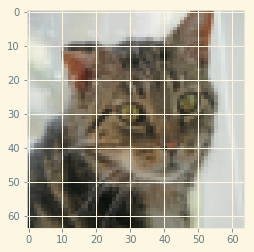

In [81]:
i = np.random.randint(0, 50)
plt.imshow(test_set_x[:,i].reshape((num_px, num_px, 3)))
pred = classes[d["prediction_test"][0,i].astype(np.int)]
print (f"y = {classes[test_set_y_orig[0,i]]}; you predicted that it is a {pred} picture.")

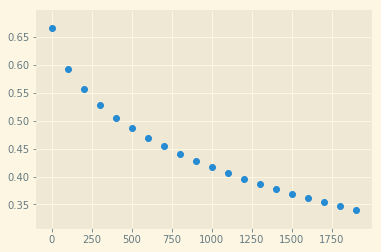

In [82]:
n = len(d['costs'])
plt.scatter(np.arange(0, n*100, 100), d['costs'])